In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.interpolate as interp
from skimage import io

In [3]:
#Import POPC(1)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\1\well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_3')
df_popc = pd.read_csv('well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_3ultimate_df.csv')
df_popc = df_popc.drop('Unnamed: 0',axis=1)

#Import Ni(2)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\2\well2_slide3_561nm_OD1p6_Ni(2)-TMR_0p5mgmL_Epi_3')
df_ni = pd.read_csv('well2_slide3_561nm_OD1p6_Ni(2)-TMR_0p5mgmL_Epi_3ultimate_df.csv')
df_ni = df_ni.drop('Unnamed: 0',axis=1)

#Import SNAP(3)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\3\well3_slide3_561nm_OD1p6_SNAP(3)-TMR_0p5mgmL_Epi_3')
df_snap3 = pd.read_csv('well3_slide3_561nm_OD1p6_SNAP(3)-TMR_0p5mgmL_Epi_3ultimate_df.csv')
df_snap3 = df_snap3.drop('Unnamed: 0',axis=1)
#Import SNAP(4)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\4\well4_slide3_561nm_OD1p6_SNAP(4)-TMR_0p5mgmL_Epi_3')
df_snap4 = pd.read_csv('well4_slide3_561nm_OD1p6_SNAP(4)-TMR_0p5mgmL_Epi_3ultimate_df.csv')
df_snap4 = df_snap4.drop('Unnamed: 0',axis=1)

# Get rid of bad data

In [4]:
df_popc

,Diff Coeff,Frac Mobile,Filename
0,14.748176,0.813663,well1_slide1_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
1,0.217695,3.045520,well1_slide1_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
2,10.200596,0.903038,well1_slide1_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
3,17.908826,0.891223,well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
4,17.277244,0.875510,well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
5,14.928912,0.928633,well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
6,13.378982,-0.819968,well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
7,13.555780,0.908209,well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...
8,8.688601,0.923957,well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_E...


In [5]:
df_popc= df_popc.drop([6]) # nonsensical diff coeff
df_popc = df_popc.drop([1]) # nonsensical mob frac

In [32]:
np.std(df_snap4['Frac Mobile'])*100

5.573026953983069

# Box and wisker plot

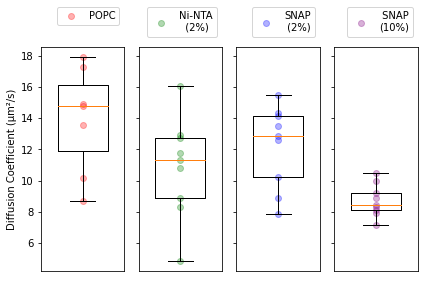

In [7]:
scatter_list = [df_popc['Diff Coeff'],df_ni['Diff Coeff'],df_snap3['Diff Coeff'],df_snap4['Diff Coeff']]
name_list = ['POPC','Ni-NTA\n  (2%)','SNAP\n (2%)',' SNAP\n(10%)']# put 2 spaces before ni to make it line up
colour_list = ['red','green','blue','purple']


fig, ax= plt.subplots(1,4,sharey=True)
for i in range(len(scatter_list)):
    scatter_list[i] = scatter_list[i]
    x = np.array([1]*len(scatter_list[i]))
    ax[i].boxplot(scatter_list[i],showfliers=False,widths=0.6)
    #ax[i].set_xlabel(name_list[i])
    ax[i].set_xticks([])
    ax[i].scatter(x,scatter_list[i], label = name_list[i],alpha =0.3,color= colour_list[i])
    ax[i].legend(bbox_to_anchor=(0.5, 0.65, 0.5, 0.55))
    
ax[0].set_ylabel('Diffusion Coefficient (µm²/s)')    

plt.tight_layout()
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP')
plt.savefig('boxwiskdiff.png', dpi=600)

# Make a similar plot for mobile frac

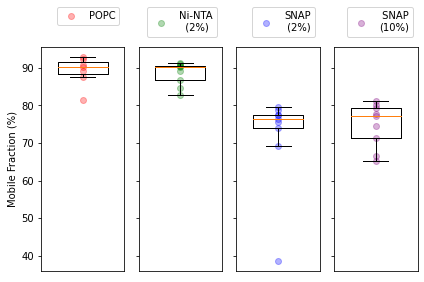

In [8]:
scatter_list = [df_popc['Frac Mobile'],df_ni['Frac Mobile'],df_snap3['Frac Mobile'],df_snap4['Frac Mobile']]
name_list = ['POPC','Ni-NTA\n  (2%)','SNAP\n (2%)',' SNAP\n(10%)']# put 2 spaces before ni to make it line up
colour_list = ['red','green','blue','purple']


fig, ax= plt.subplots(1,4,sharey=True)
for i in range(len(scatter_list)):
    scatter_list[i] = scatter_list[i]*100
    x = np.array([1]*len(scatter_list[i]))
    ax[i].boxplot(scatter_list[i],showfliers=False,widths=0.6)
    #ax[i].set_xlabel(name_list[i])
    ax[i].set_xticks([])
    ax[i].scatter(x,scatter_list[i], label = name_list[i],alpha =0.3,color= colour_list[i])
    ax[i].legend(bbox_to_anchor=(0.5, 0.65, 0.5, 0.55))
    
ax[0].set_ylabel('Mobile Fraction (%)')    
fig.set_size_inches(6, 4)
plt.tight_layout()
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP')
plt.savefig('boxwiskmob.png', dpi=600)

# Plot a nice graph of recovery

Choose files with nice recovery (mob frac diff coeff)

POPC- well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2 (0.908209, 2.13E-12)

Ni- well2_slide2_561nm_OD1p6_Ni(2)-TMR_0p5mgmL_Epi_3 (0.90428, 2.68E-12)

SNAP(3)- well3_slide1_561nm_OD1p6_SNAP(3)-TMR_0p5mgmL_Epi_1 (0.787403, 3.83E-12)

SNAP (4) - well4_slide2_561nm_OD1p6_SNAP(4)-TMR_0p5mgmL_Epi_2 (0.771885, 3.79E-12)

# Import pre bleach

Need to calculate the average pre bleach

In [270]:
#Import prePOPC(1)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\1\well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2\pre')
popc_pre = io.imread('cropped well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2_MMStack_Pos0.ome.tif')

#Import preNi(2)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\2\well2_slide2_561nm_OD1p6_Ni(2)-TMR_0p5mgmL_Epi_3\pre')
ni_pre = io.imread('cropped well2_slide2_561nm_OD1p6_Ni(2)-TMR_0p5mgmL_Epi_3_MMStack_Pos0.ome.tif')

#Import preSNAP(3)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\3\well3_slide1_561nm_OD1p6_SNAP(3)-TMR_0p5mgmL_Epi_1\pre')
snap3_pre = io.imread('cropped well3_slide1_561nm_OD1p6_SNAP(3)-TMR_0p5mgmL_Epi_1_MMStack_Pos0.ome.tif')

#Import preSNAP(4)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\4\well4_slide2_561nm_OD1p6_SNAP(4)-TMR_0p5mgmL_Epi_2\pre')
snap4_pre = io.imread('cropped well4_slide2_561nm_OD1p6_SNAP(4)-TMR_0p5mgmL_Epi_2_MMStack_Pos0.ome.tif')


Calculate the average image over the series of images in the pre bleach movie 

In [271]:
pre_array = [popc_pre,ni_pre,snap3_pre,snap4_pre] #define the pre array images

tot_pre = [np.zeros((512,512))]*4 #create array with 4 lots of 512x512 to place the totaled images in
av_array  = [np.zeros((512,512))]*4 #create array with 4 lots of 512x512 to place the averaged images in

for j in range(len(pre_array)): #iterate over all 4 experiments
    for i in range(len(pre_array[j])): #iterate over all images in each experiment
        
        tot_pre[j] = tot_pre[j] +pre_array[j][i] #redefine av_pre as the sum of all images in that experiment
    av_array[j] = av_pre[j]/len(pre_array[j]) #divide the sum of all the images by the number of images to get the average image for each pre movie

Redefine the pre bleach images in terms of the pre bleach average and find the average of each frame

In [274]:
for i in range(len(pre_array)): #iterate over each experiment
    for j in range(len(pre_array[i])): #iterate over each frame
        pre_array[i][j] = pre_array[i][j]/av_array[i] #divide each frame by the average image of all frames

In [276]:
np.mean(pre_array[0][0])

0.0

# Import post bleach-single recovery for each exp

In [22]:
#Import POPC(1)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\1\well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2')
df_popc_recov = pd.read_csv('well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_22D gaussian.csv')
df_popc_recov = df_popc_recov.drop('Unnamed: 0',axis=1)

#Import Ni(2)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\2\well2_slide2_561nm_OD1p6_Ni(2)-TMR_0p5mgmL_Epi_3')
df_ni_recov = pd.read_csv('well2_slide2_561nm_OD1p6_Ni(2)-TMR_0p5mgmL_Epi_32D gaussian.csv')
df_ni_recov = df_ni_recov.drop('Unnamed: 0',axis=1)

#Import SNAP(3)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\3\well3_slide1_561nm_OD1p6_SNAP(3)-TMR_0p5mgmL_Epi_1')
df_snap3_recov = pd.read_csv('well3_slide1_561nm_OD1p6_SNAP(3)-TMR_0p5mgmL_Epi_12D gaussian.csv')
df_snap3_recov = df_snap3_recov.drop('Unnamed: 0',axis=1)
#Import SNAP(4)
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\4\well4_slide2_561nm_OD1p6_SNAP(4)-TMR_0p5mgmL_Epi_2')
df_snap4_recov = pd.read_csv('well4_slide2_561nm_OD1p6_SNAP(4)-TMR_0p5mgmL_Epi_22D gaussian.csv')
df_snap4_recov = df_snap4_recov.drop('Unnamed: 0',axis=1)

In [23]:
df_popc_recov

,x0,y0,Depth,Re,Intensity at Re=sd,Time (s)
0,271.253553,270.889534,0.974270,151.137980,0.876470,0.000
1,261.709937,246.602969,0.799114,160.599382,0.897494,0.316
2,271.317730,285.620155,0.835793,112.009006,0.893050,0.616
3,272.367347,291.852974,0.812299,105.602857,0.895894,0.943
4,273.732773,290.644367,0.785501,103.813656,0.899149,1.363
...,...,...,...,...,...,...
252,294.677671,286.519248,0.076117,176.018984,0.989752,81.905
253,301.648948,280.169320,0.075774,170.412520,0.989798,82.292
254,289.686793,281.655176,0.075492,172.921083,0.989835,82.606
255,299.645372,280.256754,0.076682,168.620776,0.989676,82.926


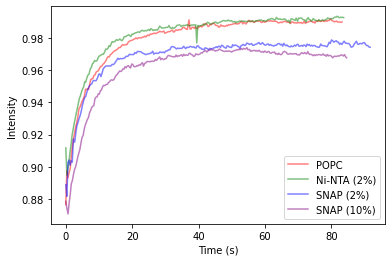

In [59]:
recovery_list = [df_popc_recov['Intensity at Re=sd'],df_ni_recov['Intensity at Re=sd'],df_snap3_recov['Intensity at Re=sd'],df_snap4_recov['Intensity at Re=sd']]
time_list = [df_popc_recov['Time (s)'],df_ni_recov['Time (s)'],df_snap3_recov['Time (s)'],df_snap4_recov['Time (s)']]
colour_list = ['red','green','blue','purple']
name_list = ['POPC','Ni-NTA (2%)','SNAP (2%)','SNAP (10%)']

fig,ax = plt.subplots()

for i in range (len(recovery_list)):
    ax.plot(time_list[i], recovery_list[i], color = colour_list[i],alpha=0.5,label = name_list[i])
    ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity')
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP')

plt.savefig('revovery.png', dpi=600)

# Import all the recovery data and make an averaged plot

Plot everything on one graph

well1_slide1_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_1 255    88.189
Name: Time (s), dtype: float64
well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_1 253    85.136
Name: Time (s), dtype: float64
well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2 254    84.914
Name: Time (s), dtype: float64
well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_3 253    84.432
Name: Time (s), dtype: float64
well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_1 252    81.94
Name: Time (s), dtype: float64
well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2 256    83.243
Name: Time (s), dtype: float64
well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_3 255    83.373
Name: Time (s), dtype: float64


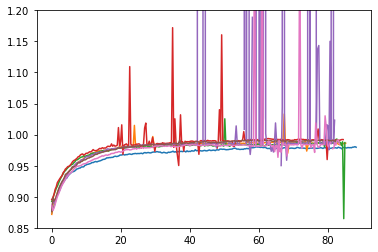

In [2]:
#Import POPC(1)
slide = [1,2,3]
repeat = [1,2,3]
fig,ax = plt.subplots()

experiment = 'POPC(1)'
for i in range(len(slide)):
    for j in range(len(repeat)):
        
        
        
        filename = 'well'+experiment[-2]+'_slide' + str(slide[i]) + '_561nm_OD1p6_'+experiment+'-TMR_0p5mgmL_Epi_' + str(repeat[j]) # set up so that goes through each directory (filename)
        
        if filename == 'well1_slide1_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2':
            break
        else:
        
        
            os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\1/'+filename)
            df_popc_recov = pd.read_csv(filename+'2D gaussian.csv')
            df_popc_recov = df_popc_recov.drop('Unnamed: 0',axis=1)
            recovery = df_popc_recov['Intensity at Re=sd']
            time = df_popc_recov['Time (s)']
            ax.plot(time,recovery)
            print(filename,time[-1:])
ax.set_ylim((0.85,1.2))
plt.show()


As time is different in each case we will have to interpolate each function to get standard time values

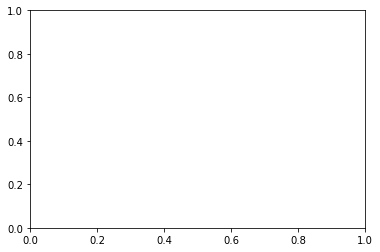

In [22]:
#Import POPC(1)
slide = [1,2,3]
repeat = [1,2,3]
fig,ax = plt.subplots()
df = pd.DataFrame(columns=['Time (s)'])
interp_time = [i for i in range(81)]
df['Time (s)'] = interp_time
experiment = 'POPC(1)'
for i in range(len(slide)):
    for j in range(len(repeat)):
        filename = 'well'+experiment[-2]+'_slide' + str(slide[i]) + '_561nm_OD1p6_'+experiment+'-TMR_0p5mgmL_Epi_' + str(repeat[j]) # set up so that goes through each directory (filename)
        
        if filename == 'well1_slide1_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2':
            break
        else:
            os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 2\FRAP\Data\2022_03_17\2022_03_17_SLB_TR\plottable\1/'+filename)
            df_popc_recov = pd.read_csv(filename+'2D gaussian.csv')
            df_popc_recov = df_popc_recov.drop('Unnamed: 0',axis=1)
            recovery = df_popc_recov['Intensity at Re=sd']
            time = df_popc_recov['Time (s)']





            
            interp_func = interp.interp1d(time,recovery)

            df.insert(1,filename, interp_func(interp_time))

df=df.set_index('Time (s)')      

In [23]:
df

,well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_3,well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2,well1_slide3_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_1,well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_3,well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_2,well1_slide2_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_1,well1_slide1_561nm_OD1p6_POPC(1)-TMR_0p5mgmL_Epi_1
Time (s),,,,,,,
0,0.885914,0.876470,0.879119,0.895467,0.892592,0.871628,0.873801
1,0.888435,0.896336,0.893656,0.912208,0.908991,0.896335,0.891474
2,0.905087,0.912695,0.909899,0.926307,0.922128,0.911555,0.907135
3,0.918640,0.924861,0.923049,0.934288,0.934288,0.921971,0.919951
4,0.928467,0.936086,0.931215,0.944794,0.942464,0.932653,0.929134
...,...,...,...,...,...,...,...
76,0.977338,0.990761,6.943280,0.991597,0.985588,0.985858,0.978431
77,0.982409,0.990343,1.137168,1.002521,0.986824,0.986262,0.977988
78,0.983758,0.990339,0.985938,0.991614,0.986574,0.986162,0.978796


In [24]:
df.std(axis=1)

Time (s)
0     0.009331
1     0.008952
2     0.007822
3     0.006466
4     0.006452
        ...   
76    2.252052
77    0.057001
78    0.004231
79    0.007878
80    0.011794
Length: 81, dtype: float64

(0.85, 2.0)

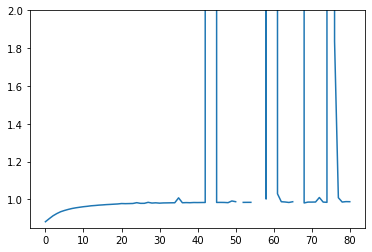

In [27]:
fig,ax= plt.subplots()
ax.plot(list(df.index.values),df.mean(axis=1))

ax.set_ylim(0.85,2)